In [1]:
import pandas as pd
import yfinance as yf
from yahoo_fin import stock_info
from datetime import datetime
from dateutil.relativedelta import relativedelta

from UsaStockDividendAnalyzer import UsaStockDividendAnalyzer

In [2]:
DIV_PERIODS = 7
STOCK_FILE_NAME = 'dividend_aristocrats.xlsx'

In [3]:
stock_df=  pd.read_excel(STOCK_FILE_NAME)
#stock_df = pd.read_csv('usa-dividend-stock-list.csv')
stock_df.head(3)

,Ticker,Name,Sector,Price,Dividend Yield,Years of Dividend Increases,1-Year Dividend Growth,5-Year Dividend Growth (Annualized),Dividends Per Share (TTM),Market Cap ($M),Trailing P/E Ratio,Payout Ratio,Beta,52-Week High,52-Week Low
0,ABT,0,Healthcare,109.49,0.018632,51,0.044444,0.109144,1.867390,190903.892844,24.198744,0.419638,0.827854,140.25,93.25
1,ABBV,0,Healthcare,165.32,0.035809,51,0.084615,0.147076,5.559867,292365.197583,21.909862,0.740328,0.356418,171.07,120.68
2,AFL,0,Financial Services,70.82,0.023722,41,0.212121,NaN,1.585087,44035.065819,8.711190,0.202956,0.679963,72.70,51.43


In [4]:
analyzers = []
for ticker in stock_df['Ticker']:
    try:
        analyzer = UsaStockDividendAnalyzer(ticker, DIV_PERIODS)
        analyzer.fit()
        analyzers.append(analyzer)
    except Exception as e:
        print(e)

ticker = ABT
[*********************100%***********************]  1 of 1 completed
ticker = ABBV
[*********************100%***********************]  1 of 1 completed
ticker = AFL
[*********************100%***********************]  1 of 1 completed
ticker = AOS
[*********************100%***********************]  1 of 1 completed
ticker = APD
[*********************100%***********************]  1 of 1 completed
ticker = ADM
[*********************100%***********************]  1 of 1 completed
ticker = ADP
[*********************100%***********************]  1 of 1 completed
ticker = BDX
[*********************100%***********************]  1 of 1 completed
ticker = BF.B
"['ticker'] not found in axis"
ticker = BRO
[*********************100%***********************]  1 of 1 completed
ticker = CAH
[*********************100%***********************]  1 of 1 completed
ticker = CAT
[*********************100%***********************]  1 of 1 completed
ticker = CB
[*********************100%**************

In [6]:
tickers = []
dividends = []
dividend_yields = []
buy_scores = []
sell_scores= []
for analyzer in analyzers:
    try:
        tickers.append(analyzer.getTicker())
        dividends.append(analyzer.getCurrentDividend())
        dividend_yields.append(analyzer.getCurrentDividendYield())
        buy_scores.append(analyzer.getBuyScore())
    except Exception as e:
        print(e)

[1.74,
 3.46,
 2.23,
 2.11,
 2.08,
 1.69,
 2.08,
 1.43,
 0.81,
 2.48,
 2.0,
 1.51,
 1.28,
 2.64,
 3.28,
 0.5,
 3.2,
 2.76,
 2.37,
 3.3,
 1.5,
 1.47,
 2.18,
 4.22,
 4.32,
 2.03,
 2.03,
 2.28,
 2.36,
 2.55,
 3.38,
 5.44,
 1.42,
 2.08,
 1.76,
 2.27,
 3.51,
 4.96,
 1.47,
 1.89,
 2.52,
 1.96,
 2.39,
 0.58,
 1.02,
 0.99,
 4.33,
 2.51,
 4.32,
 3.02,
 7.83,
 1.22,
 1.56,
 4.97,
 4.66,
 2.02,
 0.32,
 3.06,
 2.57,
 4.62,
 4.16,
 0.7,
 1.25,
 3.35]

In [ ]:
buy_scores

In [ ]:
stock_df.head(3)

In [8]:
stock_df.index = stock_df['Ticker']

In [9]:
five_year_dividend_growth_list = stock_df.filter(items=tickers, axis=0)['5-Year Dividend Growth (Annualized)'].to_list()
five_year_dividend_growth_list = [round(dividend_growth*100, 2) for dividend_growth in five_year_dividend_growth_list]

In [10]:
len(five_year_dividend_growth_list)

64

In [11]:
result_df = pd.DataFrame({'Ticker': tickers,
                            'annual dividend':dividends, 
                            'dividend yield': dividend_yields,
                            '5-Year Dividend Growth (Annualized)': five_year_dividend_growth_list,
                            'buy score': buy_scores})

In [12]:
result_df_sorted = result_df.sort_values('buy score', ascending=False)

In [13]:
result_df_sorted.index = result_df_sorted['Ticker']

In [14]:
result_df_sorted = result_df_sorted.drop('Ticker', axis=1)

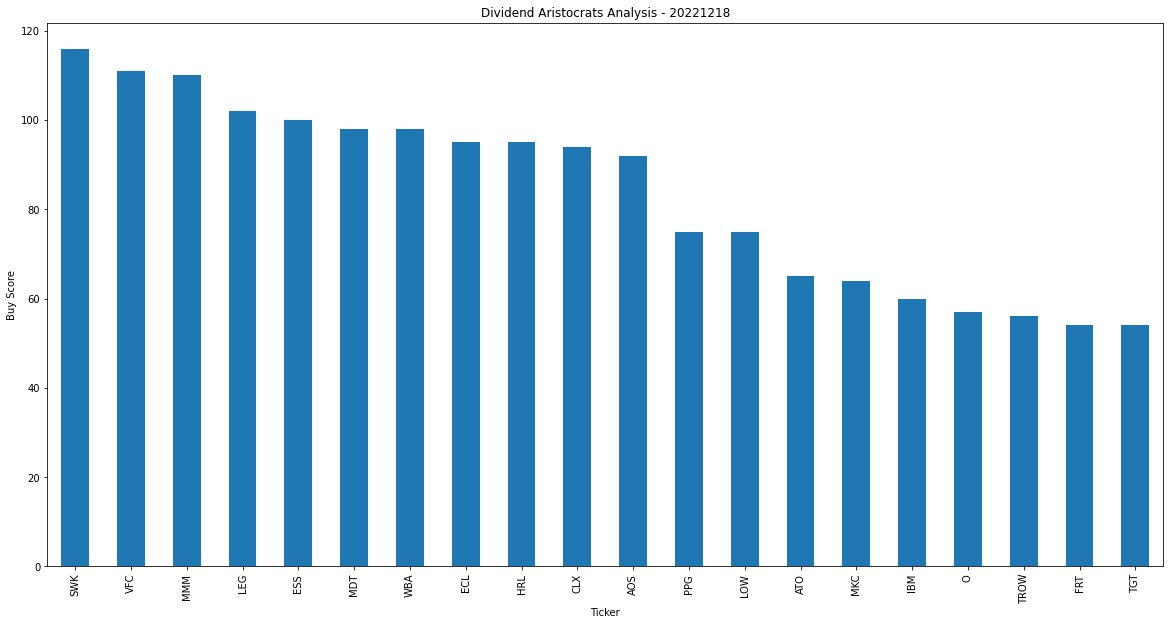

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
result_df_sorted.head(20)['buy score'].plot(kind='bar')
plt.title('Dividend Aristocrats Analysis - 20221218')
plt.xlabel('Ticker')
plt.ylabel('Buy Score')
plt.savefig('Dividend Aristocrats Analysis - 20221218.png')
plt.show()

In [ ]:
result_df_sorted.to_csv('Dividend Aristocrats Analysis - 20221218.csv')

In [ ]:
"""
FIN
"""

In [ ]:
final_df = pd.concat([stock_df, result_df], axis=1)

In [ ]:
final_df.head(3)

In [ ]:
final_df.to_excel('DIVIDEND-TABLE.xlsx', index=False)
final_df.to_csv('DIVIDEND-TABLE.csv', index=False)

In [ ]:
analyzer = UsaStockDividendAnalyzer('PFE', DIV_PERIODS)
analyzer.fit()
print(analyzer.getBuyScore())
print(analyzer.getCurrentDividend())
print(analyzer.getCurrentDividendYield())

In [28]:
def plot_result(analyzer):
    result = analyzer.getResult()
    plt.plot(result['div yield'],  color='b', label = 'dividend history')
    plt.axhline(y=min(result['div yield']), color='y', linestyle='--', label='min div yield')
    plt.axhline(y=max(result['div yield']), color='r', linestyle='--', label='max div yield')
    plt.axhline(y=analyzer.getCurrentDividendYield(), color='g', linestyle='--', label='current div yield')
    plt.title(f'{analyzer.getTicker()} buy score : {analyzer.getBuyScore()}')
    plt.xlabel('year')
    plt.ylabel('dividend yield')
    plt.legend()
    plt.savefig(f'{analyzer.getTicker()}_div_analysis.png')
    plt.show()

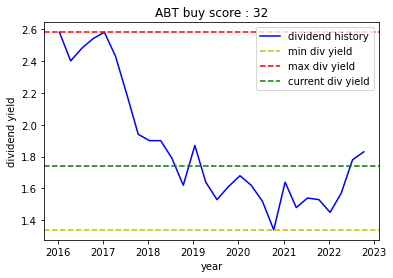

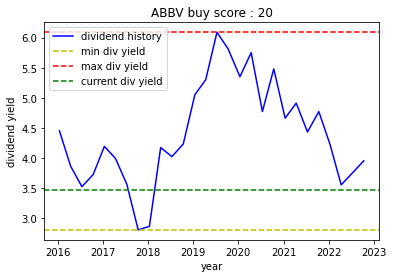

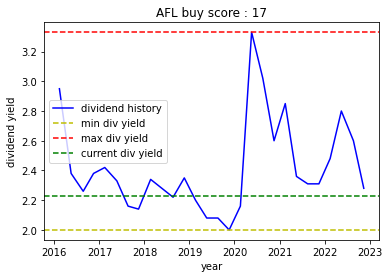

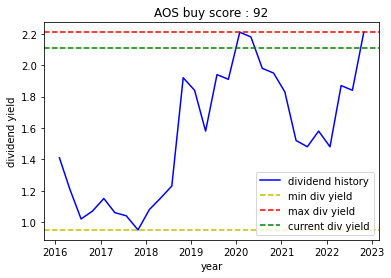

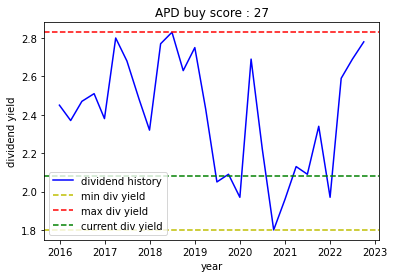

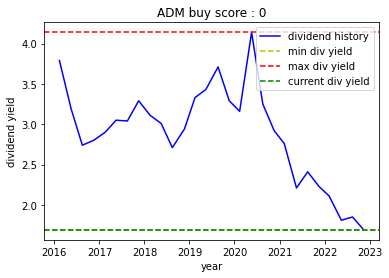

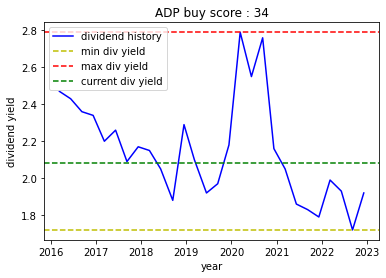

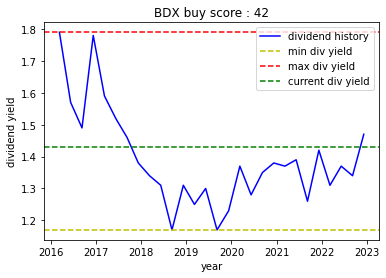

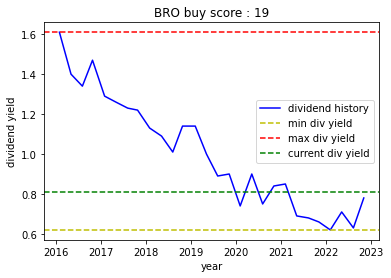

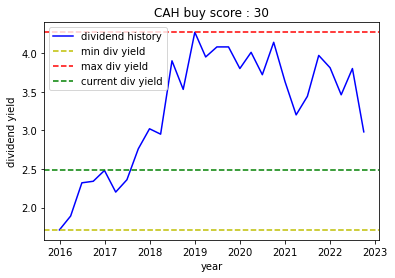

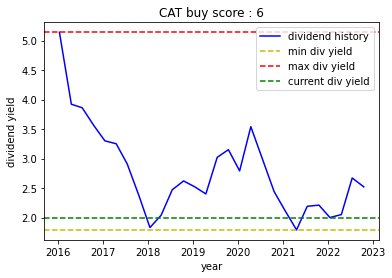

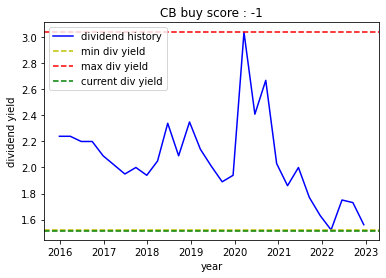

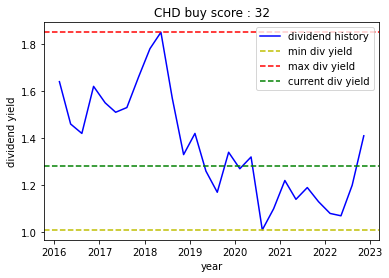

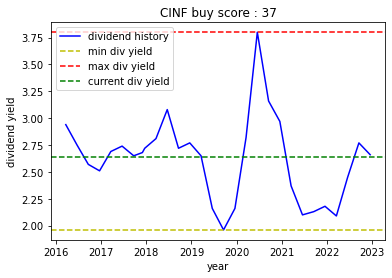

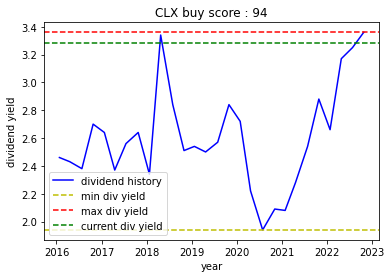

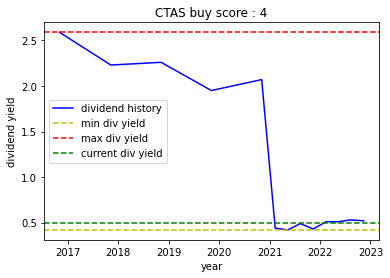

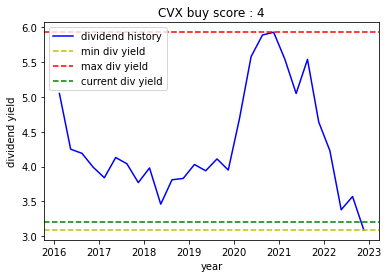

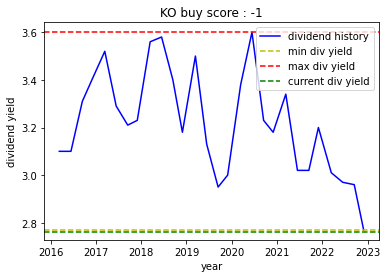

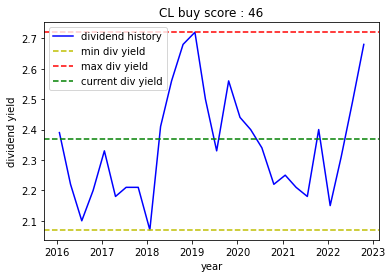

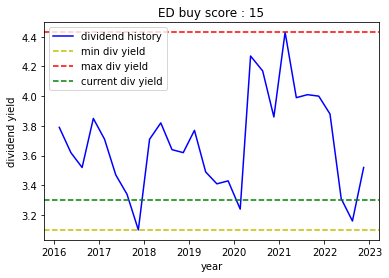

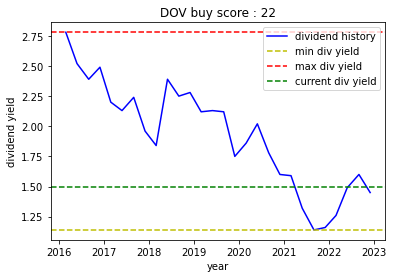

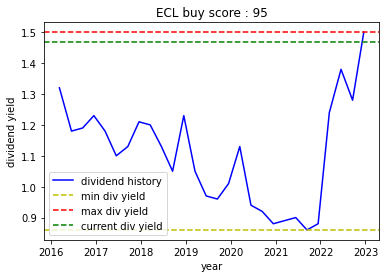

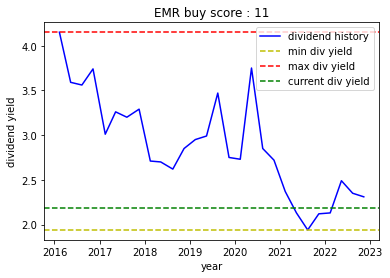

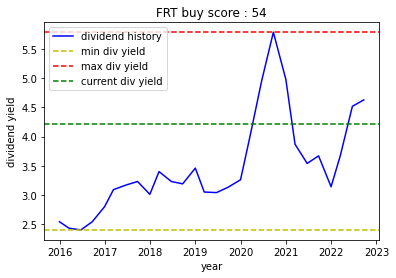

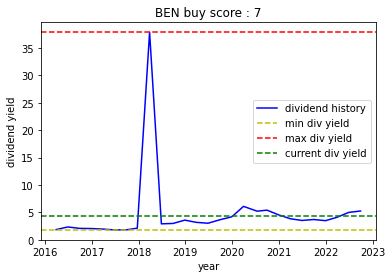

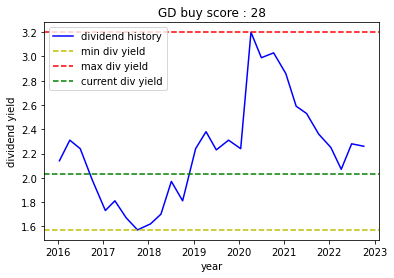

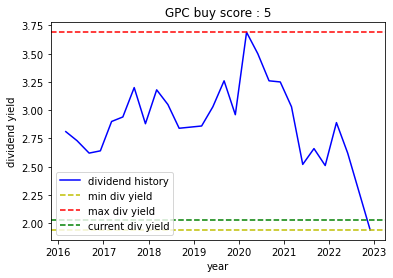

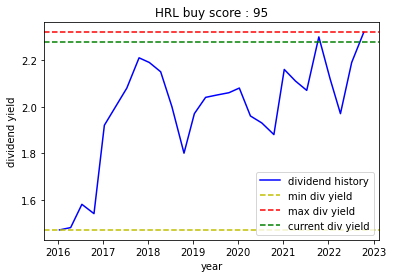

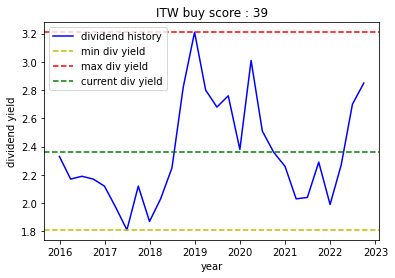

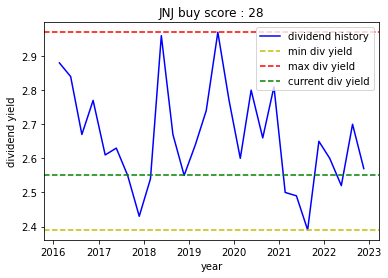

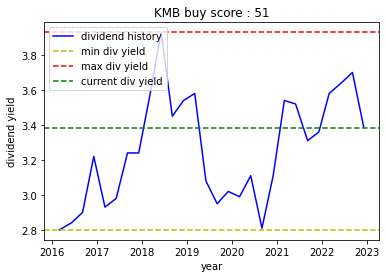

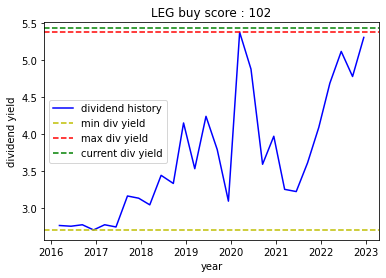

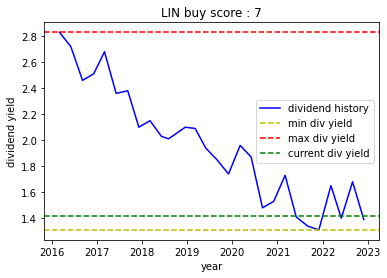

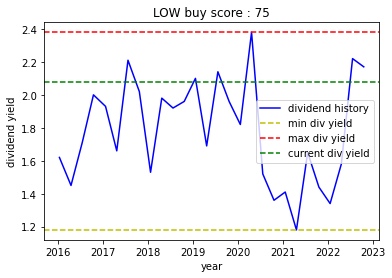

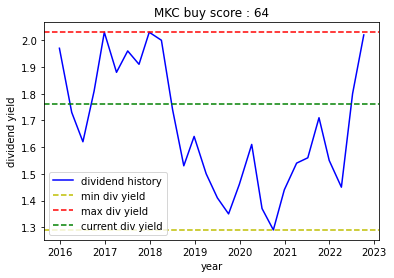

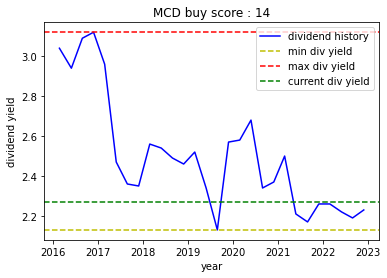

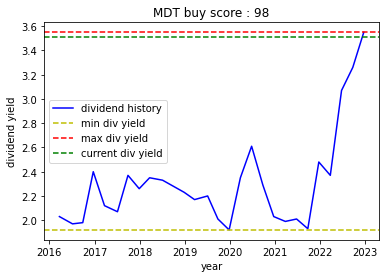

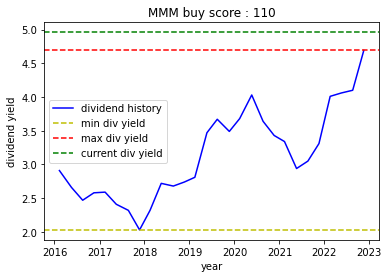

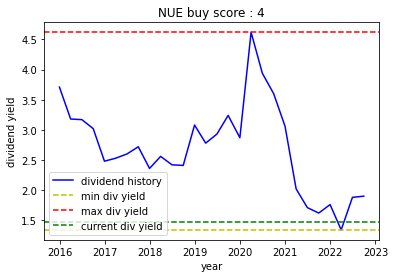

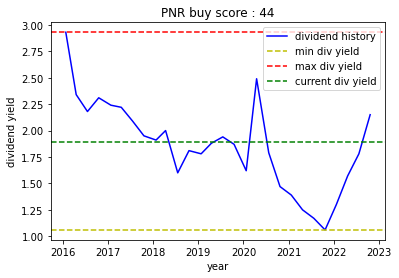

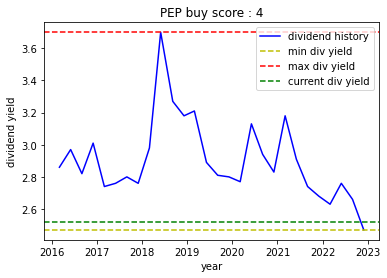

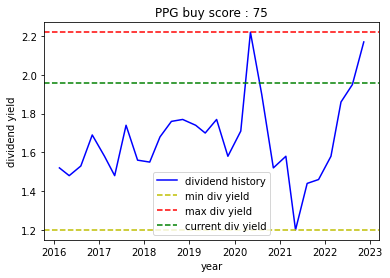

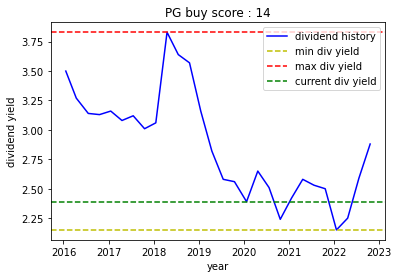

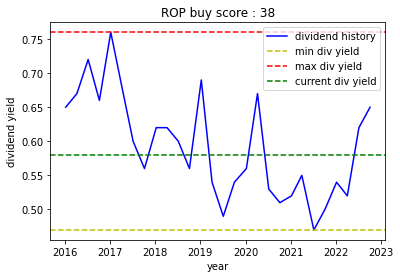

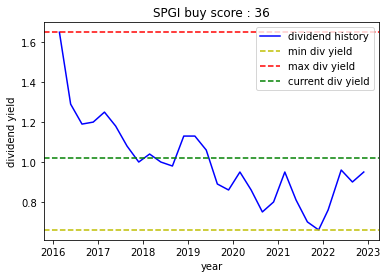

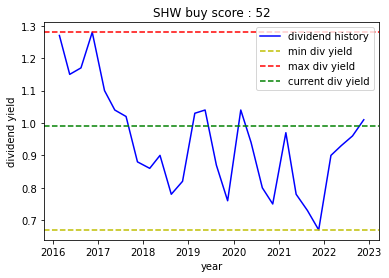

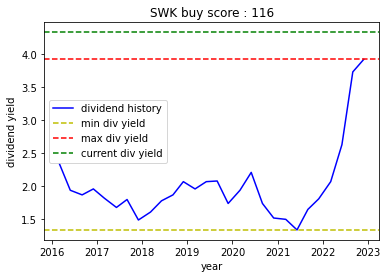

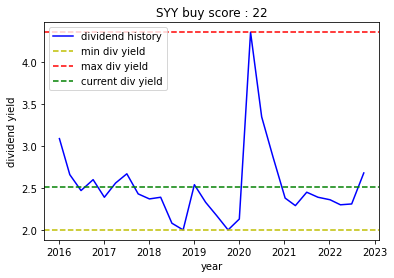

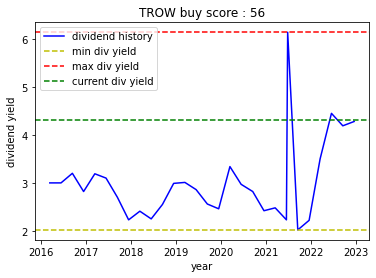

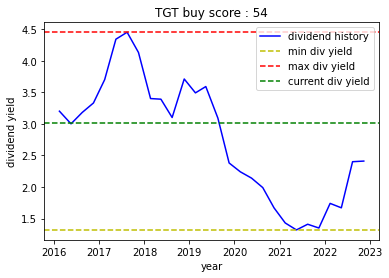

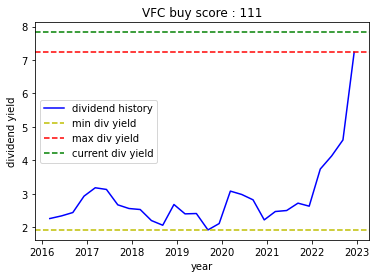

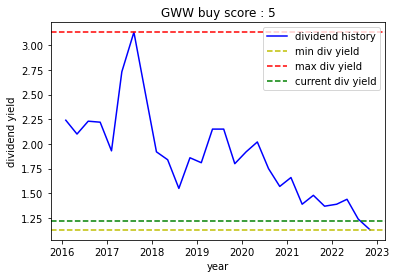

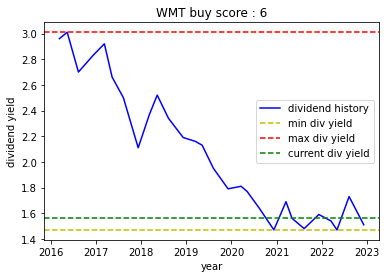

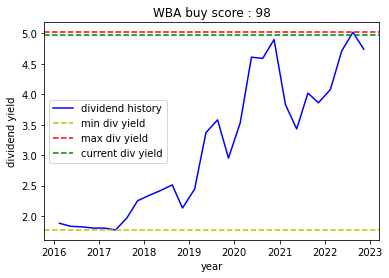

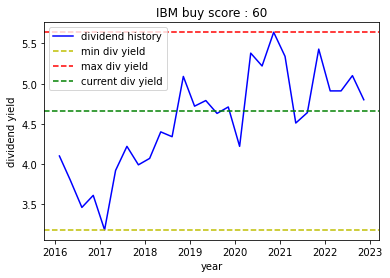

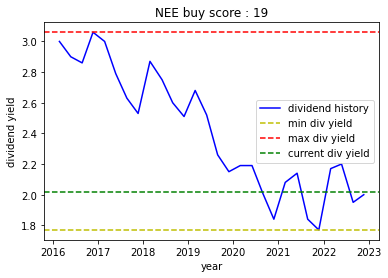

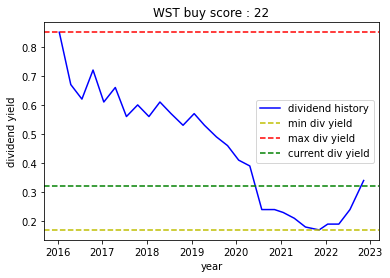

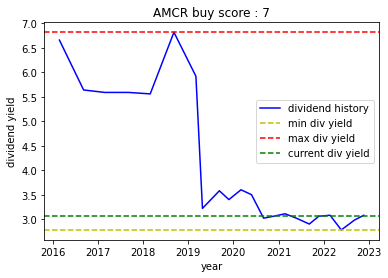

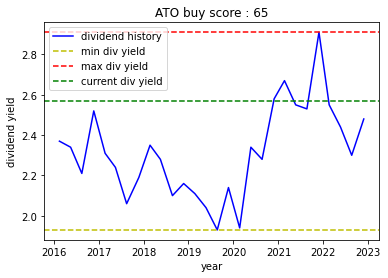

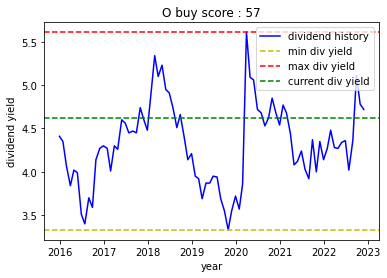

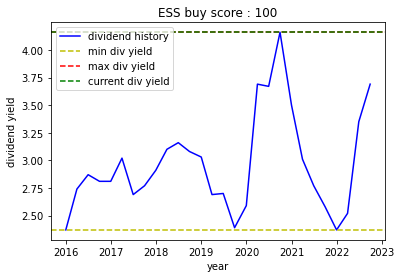

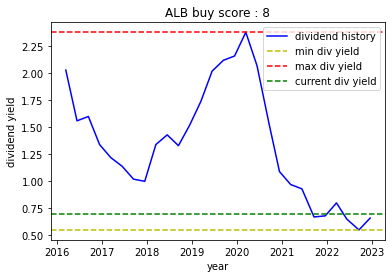

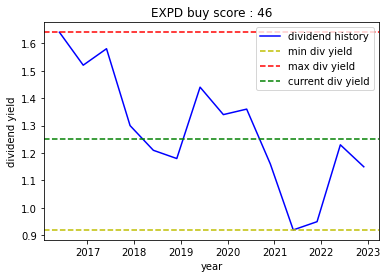

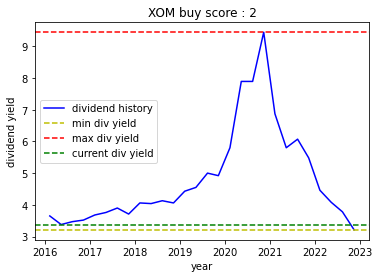

In [29]:
for analyzer in analyzers:
    plot_result(analyzer)